# Exploratory Data Analysis on The Complete Journey from Dunhumby files
Kaylynn Mosier
5 December 2024


In [4]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## Load and preview data

In [7]:
# Load data
hh_demographic = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC680/Weeks 1-4/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/hh_demographic.csv")

In [8]:
hh_demographic.head()

,classification_1,classification_2,classification_3,HOMEOWNER_DESC,classification_5,classification_4,KID_CATEGORY_DESC,household_key
0,Age Group6,X,Level4,Homeowner,Group5,2,None/Unknown,1
1,Age Group4,X,Level5,Homeowner,Group5,2,None/Unknown,7
2,Age Group2,Y,Level3,Unknown,Group4,3,1,8
3,Age Group2,Y,Level6,Homeowner,Group4,4,2,13
4,Age Group4,Z,Level5,Homeowner,Group3,1,None/Unknown,16


## Visualizations

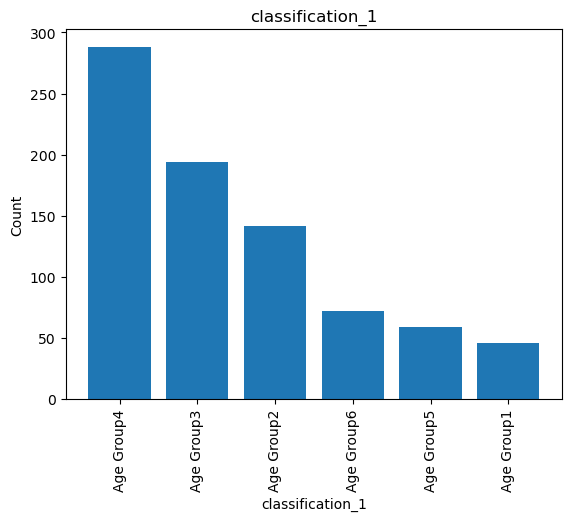

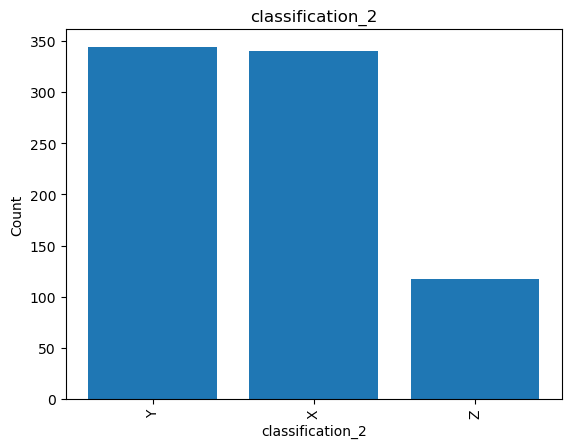

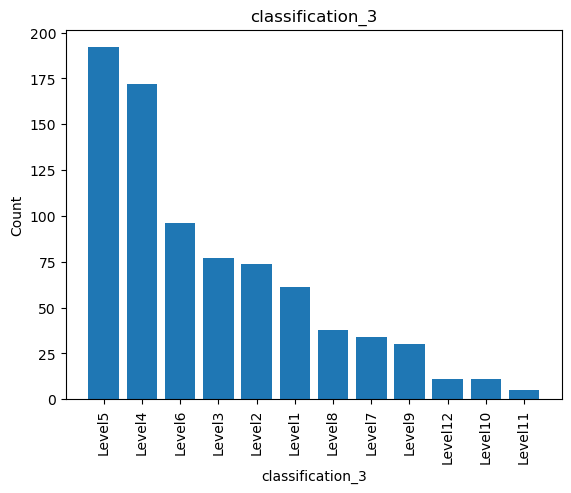

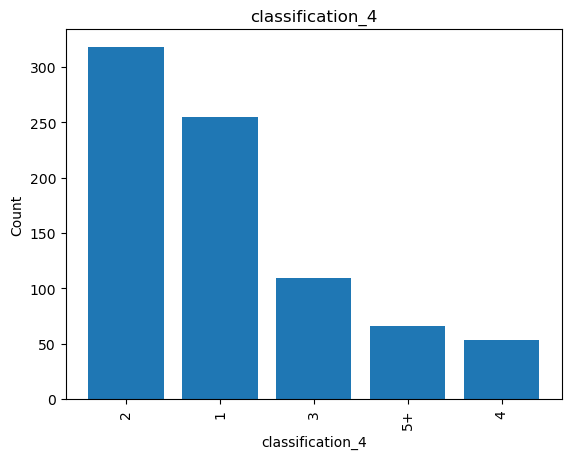

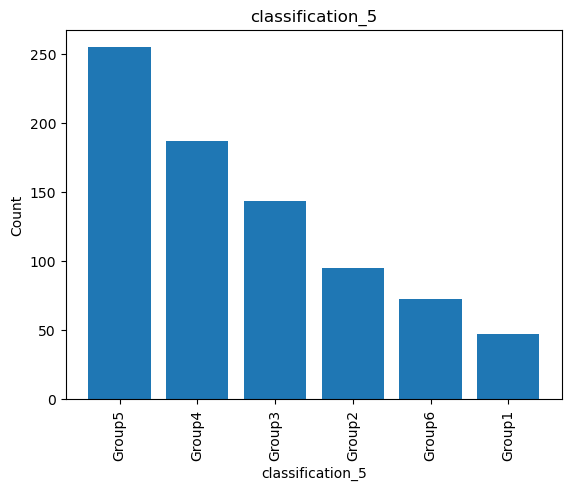

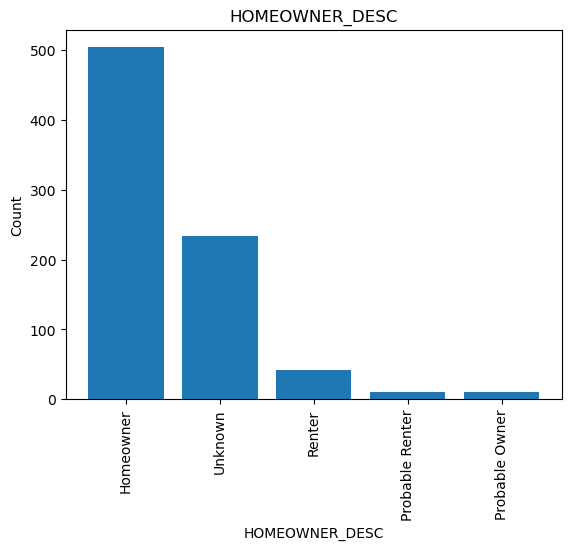

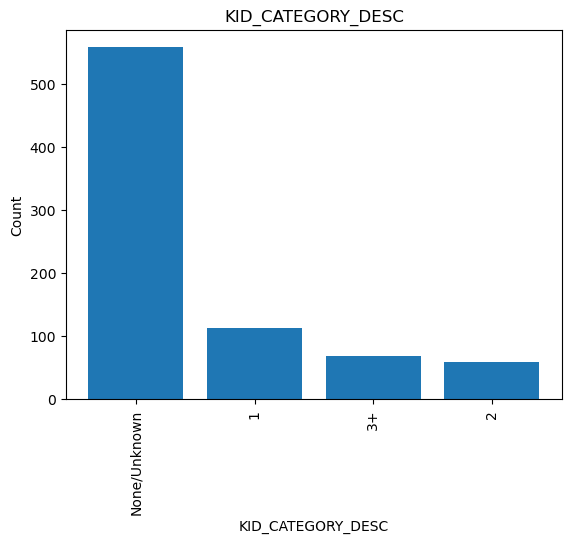

In [10]:
# Plot frequency of each demographic to understand customer base
columns = ('classification_1', 'classification_2', 'classification_3', 'classification_4', 'classification_5', 
           'HOMEOWNER_DESC', 'KID_CATEGORY_DESC')
for column in columns:
    counts = pd.DataFrame(hh_demographic[column].value_counts())
    counts.reset_index(inplace=True)

    plt.bar(counts[column], counts['count'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

## Data Preparation

In [12]:
# Find categorial variables and append them to list of categorical variables
categorical_columns = []
for column in hh_demographic:
    if np.issubdtype(hh_demographic[column].dtype, np.number) == False:
        categorical_columns.append(column)

In [13]:
# Encode each categorical column as numeric value
for column in categorical_columns:
    # Check unique values in column
    column_unique = hh_demographic[column].unique()
    
    # Encode column as numeric value
    encoder = OrdinalEncoder(categories=[column_unique])
    hh_demographic["{column}_encoded".format(column=column)] = encoder.fit_transform(hh_demographic[[column]])
    hh_demographic.drop(column, inplace=True, axis=1)

In [14]:
# Set household_key as index
hh_demographic.set_index('household_key', inplace=True)
hh_demographic.head(5)

,classification_1_encoded,classification_2_encoded,classification_3_encoded,HOMEOWNER_DESC_encoded,classification_5_encoded,classification_4_encoded,KID_CATEGORY_DESC_encoded
household_key,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2.0,1.0,2.0,1.0,1.0,1.0,1.0
13,2.0,1.0,3.0,0.0,1.0,2.0,2.0
16,1.0,2.0,1.0,0.0,2.0,3.0,0.0


Although the abovelooks like it correctly encoded the columns, ordinality was not correctly retained. Each column will need to be encoded on it's own to make sure ordinality is retained.

In [16]:
# Load data
hh_demographic = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC680/Weeks 1-4/dunnhumby_The-Complete-Journey/dunnhumby_The-Complete-Journey CSV/hh_demographic.csv")
hh_demographic.head()

,classification_1,classification_2,classification_3,HOMEOWNER_DESC,classification_5,classification_4,KID_CATEGORY_DESC,household_key
0,Age Group6,X,Level4,Homeowner,Group5,2,None/Unknown,1
1,Age Group4,X,Level5,Homeowner,Group5,2,None/Unknown,7
2,Age Group2,Y,Level3,Unknown,Group4,3,1,8
3,Age Group2,Y,Level6,Homeowner,Group4,4,2,13
4,Age Group4,Z,Level5,Homeowner,Group3,1,None/Unknown,16


In [17]:
# Find unique values in classification_1 column
hh_demographic['classification_1'].unique()

array(['Age Group6', 'Age Group4', 'Age Group2', 'Age Group3',
       'Age Group1', 'Age Group5'], dtype=object)

In [18]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['Age Group1', 'Age Group2', 'Age Group3', 'Age Group4', 'Age Group5', 'Age Group6']])
hh_demographic['classification_1_encoded'] = encoder.fit_transform(hh_demographic[['classification_1']])
hh_demographic.drop('classification_1', inplace=True, axis=1)

In [19]:
# Find unique values in classification_2 column
hh_demographic['classification_2'].unique()

array(['X', 'Y', 'Z'], dtype=object)

In [20]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['X', 'Y', 'Z']])
hh_demographic['classification_2_encoded'] = encoder.fit_transform(hh_demographic[['classification_2']])
hh_demographic.drop('classification_2', inplace=True, axis=1)

In [21]:
# Find unique values in classification_3 column
hh_demographic['classification_3'].unique()

array(['Level4', 'Level5', 'Level3', 'Level6', 'Level1', 'Level7',
       'Level2', 'Level8', 'Level9', 'Level12', 'Level10', 'Level11'],
      dtype=object)

In [22]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['Level1', 'Level2', 'Level3', 'Level4', 'Level5', 'Level6', 'Level7', 
                                     'Level8', 'Level9', 'Level10', 'Level11', 'Level12']])
hh_demographic['classification_3_encoded'] = encoder.fit_transform(hh_demographic[['classification_3']])
hh_demographic.drop('classification_3', inplace=True, axis=1)

In [23]:
# Find unique values in classification_4 column
hh_demographic['classification_4'].unique()

array(['2', '3', '4', '1', '5+'], dtype=object)

In [24]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['1','2','3','4','5+']])
hh_demographic['classification_4_encoded'] = encoder.fit_transform(hh_demographic[['classification_4']])
hh_demographic.drop('classification_4', inplace=True, axis=1)

In [25]:
# Find unique values in classification_5 column
hh_demographic['classification_5'].unique()

array(['Group5', 'Group4', 'Group3', 'Group6', 'Group2', 'Group1'],
      dtype=object)

In [26]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6']])
hh_demographic['classification_5_encoded'] = encoder.fit_transform(hh_demographic[['classification_5']])
hh_demographic.drop('classification_5', inplace=True, axis=1)

In [27]:
# Find unique values in HOMEOWNER_DESC column
hh_demographic['HOMEOWNER_DESC'].unique()

array(['Homeowner', 'Unknown', 'Renter', 'Probable Renter',
       'Probable Owner'], dtype=object)

In [28]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner']])
hh_demographic['homeowner_desc_encoded'] = encoder.fit_transform(hh_demographic[['HOMEOWNER_DESC']])
hh_demographic.drop('HOMEOWNER_DESC', inplace=True, axis=1)

In [29]:
# Find unique values in KID_CATEGORY_DESC column
hh_demographic['KID_CATEGORY_DESC'].unique()

array(['None/Unknown', '1', '2', '3+'], dtype=object)

In [30]:
# Encode column as numeric value
encoder = OrdinalEncoder(categories=[['None/Unknown', '1', '2', '3+']])
hh_demographic['kid_category_encoded'] = encoder.fit_transform(hh_demographic[['KID_CATEGORY_DESC']])
hh_demographic.drop('KID_CATEGORY_DESC', inplace=True, axis=1)

In [31]:
hh_demographic.set_index('household_key', inplace=True)
hh_demographic.head()

,classification_1_encoded,classification_2_encoded,classification_3_encoded,classification_4_encoded,classification_5_encoded,homeowner_desc_encoded,kid_category_encoded
household_key,,,,,,,
1,5.0,0.0,3.0,1.0,4.0,4.0,0.0
7,3.0,0.0,4.0,1.0,4.0,4.0,0.0
8,1.0,1.0,2.0,2.0,3.0,0.0,1.0
13,1.0,1.0,5.0,3.0,3.0,4.0,2.0
16,3.0,2.0,4.0,0.0,2.0,4.0,0.0


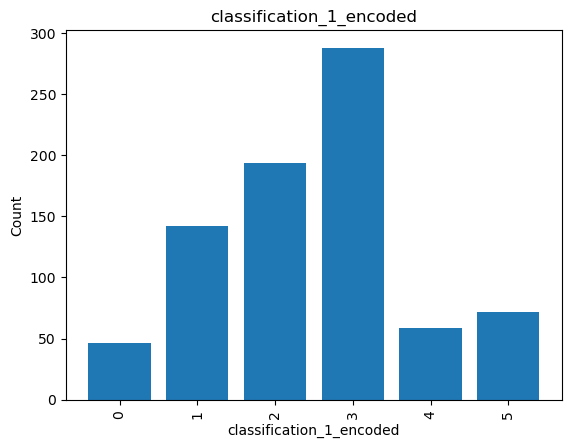

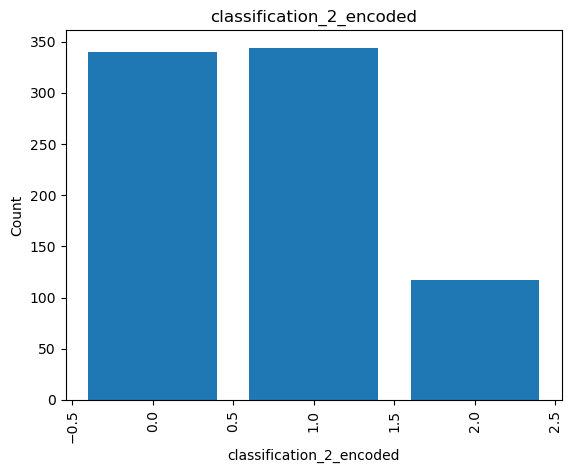

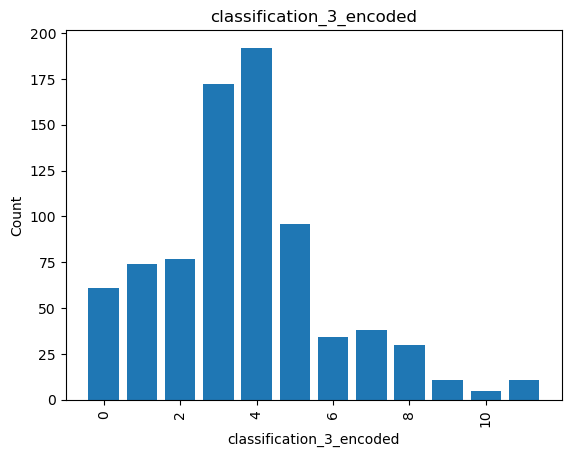

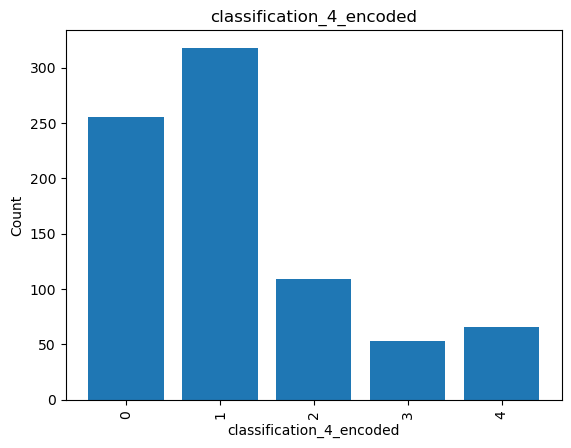

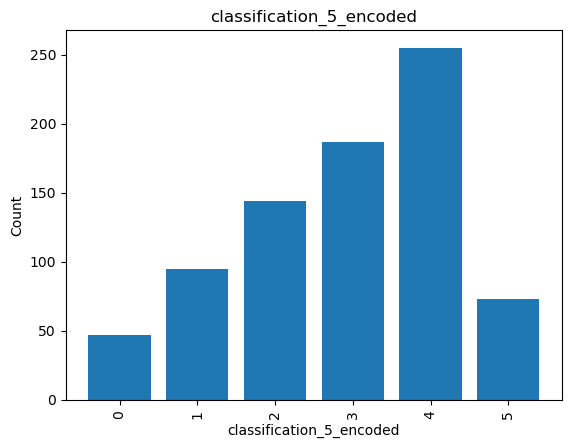

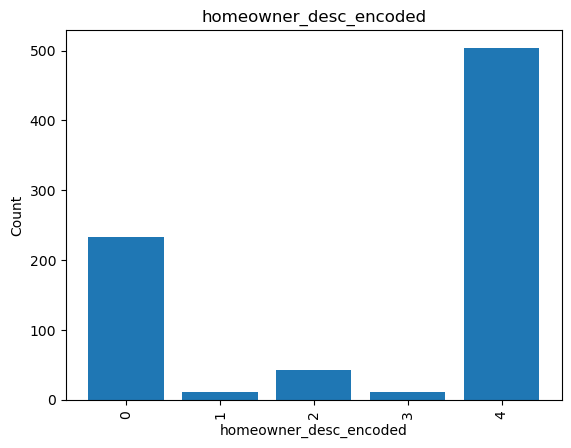

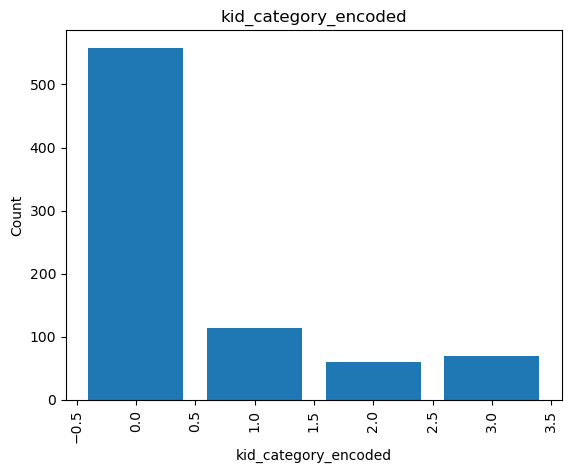

In [32]:
# Plot frequency of each demographic to understand customer base
columns = ('classification_1_encoded', 'classification_2_encoded', 'classification_3_encoded', 'classification_4_encoded', 'classification_5_encoded', 
           'homeowner_desc_encoded', 'kid_category_encoded')
for column in columns:
    counts = pd.DataFrame(hh_demographic[column].value_counts())
    counts.reset_index(inplace=True)

    plt.bar(counts[column], counts['count'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

## Model Building- KMeans Clustering

In [34]:
# Apply StandardScaler to data
scaled_df = StandardScaler().fit_transform(hh_demographic)

In [35]:
# Define K-means model
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=21)

In [36]:
# Train the model
kmeans_model.fit(scaled_df)

KMeans(max_iter=400, random_state=21)

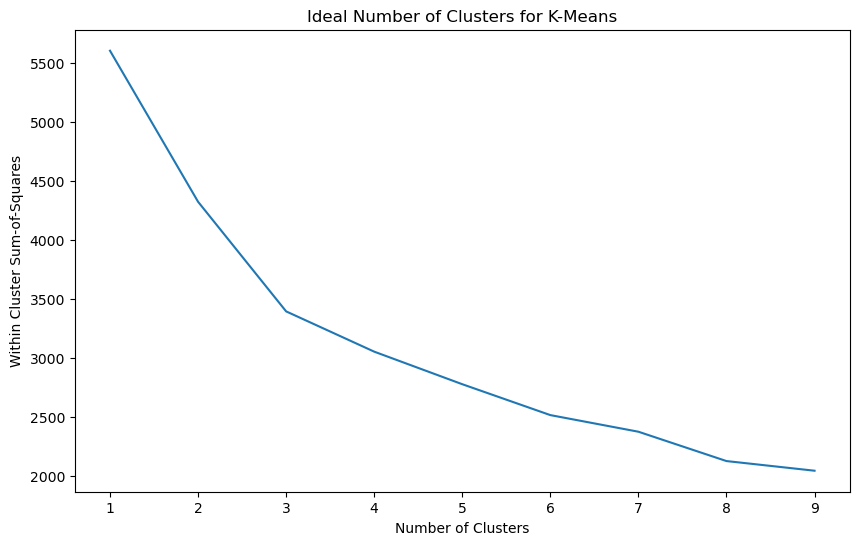

In [37]:
# Find ideal number of clusters by finding within cluster sum of squares
WCSS=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(scaled_df)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum-of-Squares')
plt.title('Ideal Number of Clusters for K-Means')
plt.show()

The correct number of clusters is not immediately evident from the elbow plot; 4, 5, and 6 clusters could all be viable options.

In [39]:
# Train K means model with k=4
kmeans_model_new = KMeans(n_clusters = 4,init='k-means++',max_iter=400,random_state=21)

# Predict which cluster each household belongs to
predictions = kmeans_model_new.fit_predict(scaled_df)

# Add "clusters" to data
hh_demographic["clusters"] = predictions
hh_demographic

,classification_1_encoded,classification_2_encoded,classification_3_encoded,classification_4_encoded,classification_5_encoded,homeowner_desc_encoded,kid_category_encoded,clusters
household_key,,,,,,,,
1,5.0,0.0,3.0,1.0,4.0,4.0,0.0,2
7,3.0,0.0,4.0,1.0,4.0,4.0,0.0,2
8,1.0,1.0,2.0,2.0,3.0,0.0,1.0,3
13,1.0,1.0,5.0,3.0,3.0,4.0,2.0,1
16,3.0,2.0,4.0,0.0,2.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...
2494,2.0,1.0,4.0,1.0,4.0,4.0,0.0,2
2496,3.0,0.0,5.0,2.0,5.0,4.0,1.0,2
2497,3.0,1.0,3.0,0.0,1.0,0.0,0.0,3


In [40]:
# Check cluster sizes
hh_demographic['clusters'].value_counts()

clusters
2    322
3    234
1    128
0    117
Name: count, dtype: int64

There is a fairly large disparity in cluster size with K=4, which is a violation of the assumptions of the k-means algorithm. This disparity might be reduced by adding more clusters.

In [41]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=21)

# Predict which cluster each household belongs to
predictions = kmeans_model_new.fit_predict(scaled_df)

# Add "clusters" to data
hh_demographic["clusters"] = predictions

# Check cluster sizes
hh_demographic['clusters'].value_counts()

clusters
3    231
2    182
4    151
1    119
0    118
Name: count, dtype: int64

The disparity in cluster size haas been greatly reduced when k=5. To ensure there is not a better option, I will also try to fit the model with K=6.

In [42]:
# Re-Train K means model with k=6
kmeans_model_new = KMeans(n_clusters = 6,init='k-means++',max_iter=400,random_state=21)

# Predict which cluster each household belongs to
predictions = kmeans_model_new.fit_predict(scaled_df)

# Add "clusters" to data
hh_demographic["clusters"] = predictions

# Check cluster sizes
hh_demographic['clusters'].value_counts()

clusters
3    219
2    162
1    119
0    116
4    115
5     70
Name: count, dtype: int64

5 clusters provides the largest decrease in between cluster sum of square (visualized in the above elboy plot) while retaining roughly equal distribution of households between clusters.

In [44]:
# Finalize model
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=21)

# Predict which cluster each household belongs to
predictions = kmeans_model_new.fit_predict(scaled_df)

# Add "clusters" to data
hh_demographic["clusters"] = predictions

# Check cluster sizes
hh_demographic['clusters'].value_counts()

clusters
3    231
2    182
4    151
1    119
0    118
Name: count, dtype: int64

## Visualizing Results

In [46]:
# Reset index
hh_demographic.reset_index(inplace=True)
hh_demographic.head()

,household_key,classification_1_encoded,classification_2_encoded,classification_3_encoded,classification_4_encoded,classification_5_encoded,homeowner_desc_encoded,kid_category_encoded,clusters
0,1,5.0,0.0,3.0,1.0,4.0,4.0,0.0,2
1,7,3.0,0.0,4.0,1.0,4.0,4.0,0.0,2
2,8,1.0,1.0,2.0,2.0,3.0,0.0,1.0,3
3,13,1.0,1.0,5.0,3.0,3.0,4.0,2.0,1
4,16,3.0,2.0,4.0,0.0,2.0,4.0,0.0,0


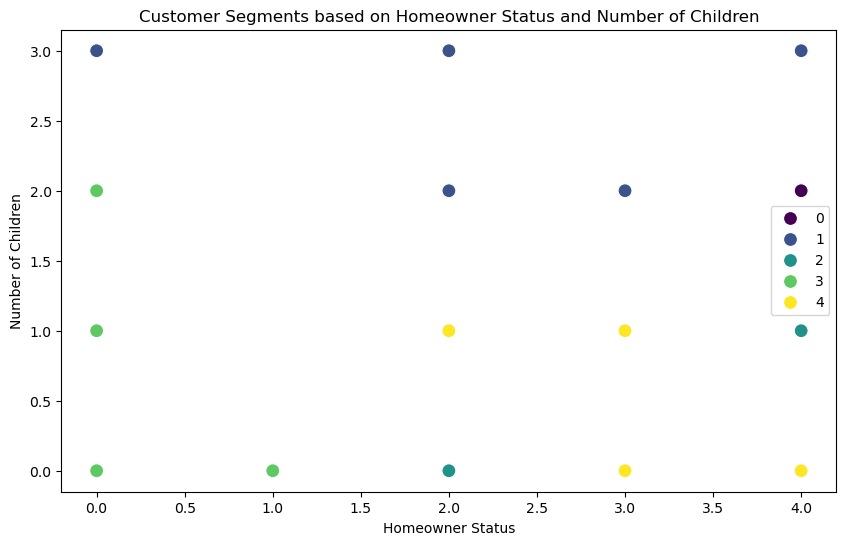

In [47]:
# Visualize the clusters using homeowner_desc_encoded and kid_category_encoded
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hh_demographic['homeowner_desc_encoded'], y=hh_demographic['kid_category_encoded'], hue=hh_demographic['clusters'], palette='viridis', s=100)
plt.title('Customer Segments based on Homeowner Status and Number of Children')
plt.xlabel('Homeowner Status')
plt.ylabel('Number of Children')
plt.legend()
plt.show()

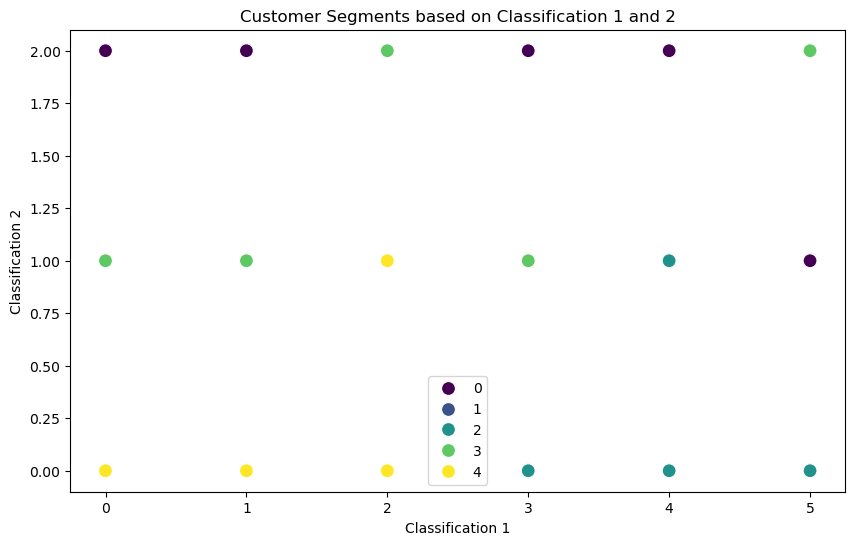

In [48]:
# Visualize the clusters using classification_1 and classification_2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hh_demographic['classification_1_encoded'], y=hh_demographic['classification_2_encoded'], hue=hh_demographic['clusters'], palette='viridis', s=100)
plt.title('Customer Segments based on Classification 1 and 2')
plt.xlabel('Classification 1')
plt.ylabel('Classification 2')
plt.legend()
plt.show()

Visualizing this data in scatter plot form is difficult since the data has been ordianlly encoded and many datapoints fall in the sampe place.

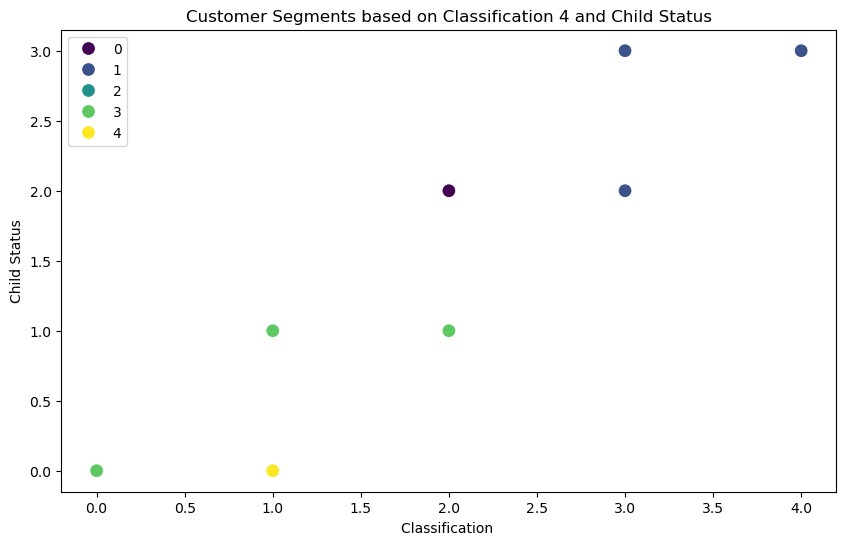

In [50]:
# Visualize the clusters using classification_4 and kid_catrgory
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hh_demographic['classification_4_encoded'], y=hh_demographic['kid_category_encoded'], hue=hh_demographic['clusters'], palette='viridis', s=100)
plt.title('Customer Segments based on Classification 4 and Child Status')
plt.xlabel('Classification ')
plt.ylabel('Child Status')
plt.legend()
plt.show()

Due to the nature of this data it is difficult to visualize a scatter plot of the different clusters. I may be able to visualize them by comparing and contrasting histograms of each attribute across the clusters.

In [51]:
hh_demographic.head()

,household_key,classification_1_encoded,classification_2_encoded,classification_3_encoded,classification_4_encoded,classification_5_encoded,homeowner_desc_encoded,kid_category_encoded,clusters
0,1,5.0,0.0,3.0,1.0,4.0,4.0,0.0,2
1,7,3.0,0.0,4.0,1.0,4.0,4.0,0.0,2
2,8,1.0,1.0,2.0,2.0,3.0,0.0,1.0,3
3,13,1.0,1.0,5.0,3.0,3.0,4.0,2.0,1
4,16,3.0,2.0,4.0,0.0,2.0,4.0,0.0,0


In [52]:
# Filter dataset into separate datasets, each containing one cluster
cluster_1 = hh_demographic.loc[hh_demographic['clusters']==0]
cluster_2 = hh_demographic.loc[hh_demographic['clusters']==1]
cluster_3 = hh_demographic.loc[hh_demographic['clusters']==2]
cluster_4 = hh_demographic.loc[hh_demographic['clusters']==3]
cluster_5 = hh_demographic.loc[hh_demographic['clusters']==4]

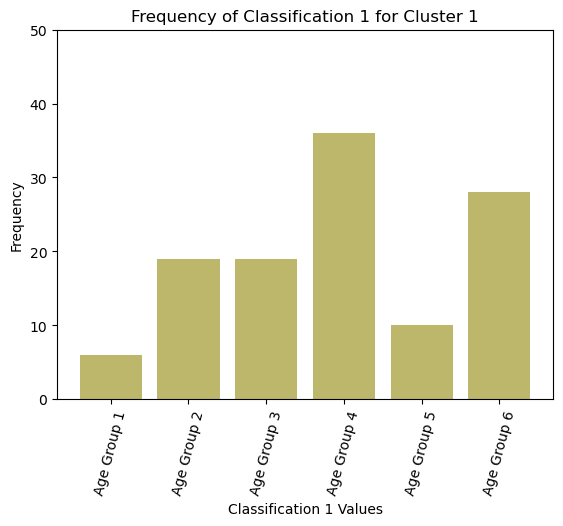

In [53]:
# Plot bar plot of a variable for cluster 1
x= cluster_1['classification_1_encoded'].unique()
y = cluster_1['classification_1_encoded'].value_counts() 
    
plt.bar(x, y, color='darkkhaki')
plt.xlabel('Classification 1 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 1 for Cluster 1')
plt.ylim(0, 50)
plt.xticks([0,1,2,3,4,5], ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5', 'Age Group 6'])
plt.xticks(rotation=75)
plt.show()

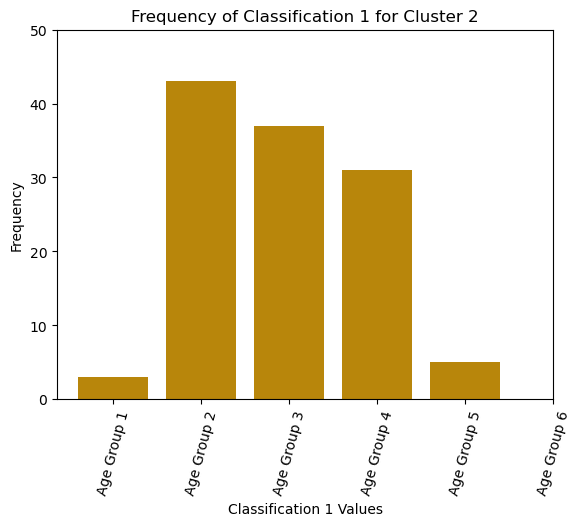

In [54]:
# Plot bar plot of a variable for cluster 2
x= cluster_2['classification_1_encoded'].unique()
y = cluster_2['classification_1_encoded'].value_counts() 
    
plt.bar(x, y, color='darkgoldenrod')
plt.xlabel('Classification 1 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 1 for Cluster 2')
plt.ylim(0, 50)
plt.xticks([0,1,2,3,4,5], ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5', 'Age Group 6'])
plt.xticks(rotation=75)
plt.show()

Cluster 2 contains a younger average consumer than cluster 1.

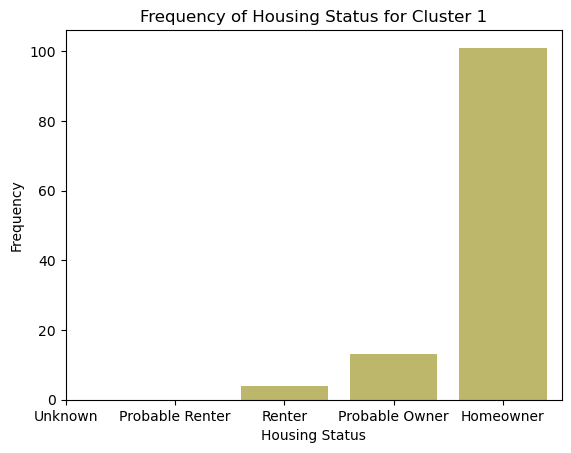

In [55]:
# Plot bar plot of a variable for cluster 1
x= cluster_1['homeowner_desc_encoded'].unique()
y = cluster_1['homeowner_desc_encoded'].value_counts() 
    
plt.bar(x, y, color='darkkhaki')
plt.xlabel('Housing Status')
plt.ylabel('Frequency')
plt.title('Frequency of Housing Status for Cluster 1')
plt.xticks([0,1,2,3,4], ['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner'])
#plt.xticks(rotation=75)
plt.show()

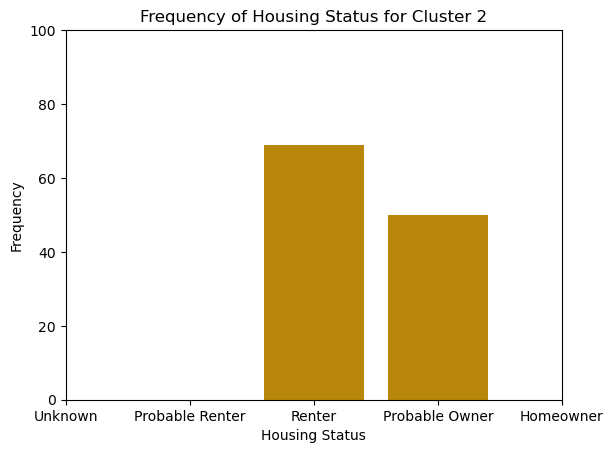

In [56]:
# Plot bar plot of a variable for cluster 2
x= cluster_2['kid_category_encoded'].unique()
y = cluster_2['kid_category_encoded'].value_counts() 
    
plt.bar(x, y, color='darkgoldenrod')
plt.xlabel('Housing Status')
plt.ylabel('Frequency')
plt.title('Frequency of Housing Status for Cluster 2')
plt.xticks([0,1,2,3,4], ['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner'])
plt.ylim(0,100)
plt.show()

Most customers in cluster 1 are homeowners while in cluster 2 they are more likely to be renters.

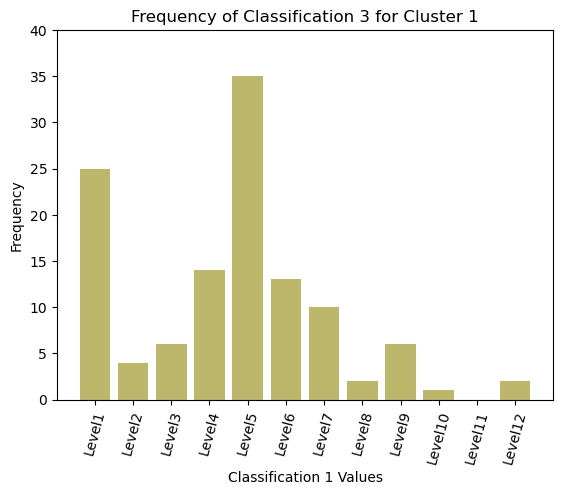

In [57]:
# Plot bar plot of a variable for cluster 1
x= cluster_1['classification_3_encoded'].unique()
y = cluster_1['classification_3_encoded'].value_counts() 
    
plt.bar(x, y, color='darkkhaki')
plt.xlabel('Classification 1 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 3 for Cluster 1')
plt.ylim(0, 40)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Level1', 'Level2', 'Level3', 'Level4', 'Level5', 'Level6', 'Level7', 
                                     'Level8', 'Level9', 'Level10', 'Level11', 'Level12'])
plt.xticks(rotation=75)
plt.show()

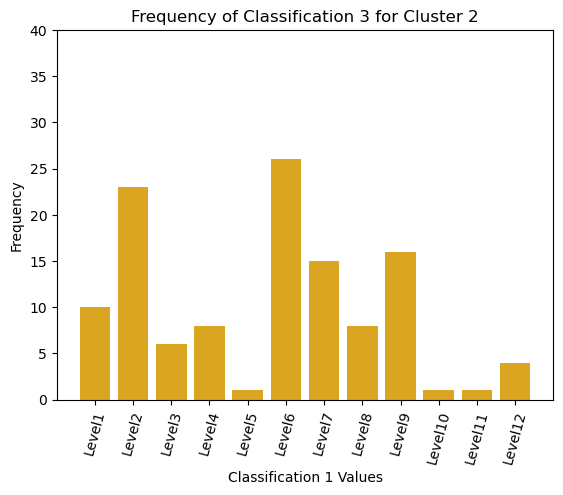

In [58]:
# Plot bar plot of a variable for cluster 2
x= cluster_2['classification_3_encoded'].unique()
y = cluster_2['classification_3_encoded'].value_counts() 
    
plt.bar(x, y, color='goldenrod')
plt.xlabel('Classification 1 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 3 for Cluster 2')
plt.ylim(0, 40)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Level1', 'Level2', 'Level3', 'Level4', 'Level5', 'Level6', 'Level7', 
                                     'Level8', 'Level9', 'Level10', 'Level11', 'Level12'])
plt.xticks(rotation=75)
plt.show()

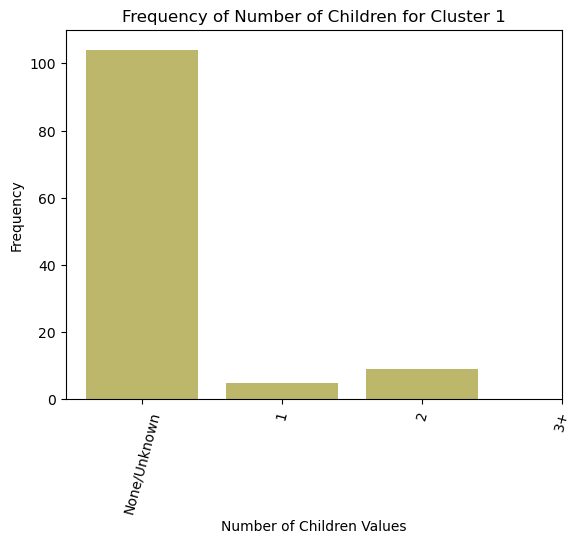

In [59]:
# Plot bar plot of a variable for cluster 1
x= cluster_1['kid_category_encoded'].unique()
y = cluster_1['kid_category_encoded'].value_counts() 
    
plt.bar(x, y, color='darkkhaki')
plt.xlabel('Number of Children Values')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Children for Cluster 1')
plt.ylim(0, 110)
plt.xticks([0,1,2,3], ['None/Unknown', '1', '2', '3+'])
plt.xticks(rotation=75)
plt.show()

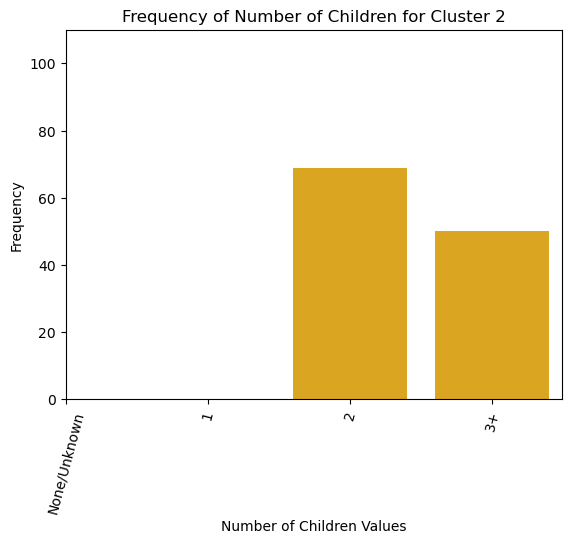

In [60]:
# Plot bar plot of a variable for cluster 2
x= cluster_2['kid_category_encoded'].unique()
y = cluster_2['kid_category_encoded'].value_counts() 
    
plt.bar(x, y, color='goldenrod')
plt.xlabel('Number of Children Values')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Children for Cluster 2')
plt.ylim(0, 110)
plt.xticks([0,1,2,3], ['None/Unknown', '1', '2', '3+'])
plt.xticks(rotation=75)
plt.show()

Individuals in cluster 1 either have no children, or their number of children is unknown while cluster 2 has 2 or more children.

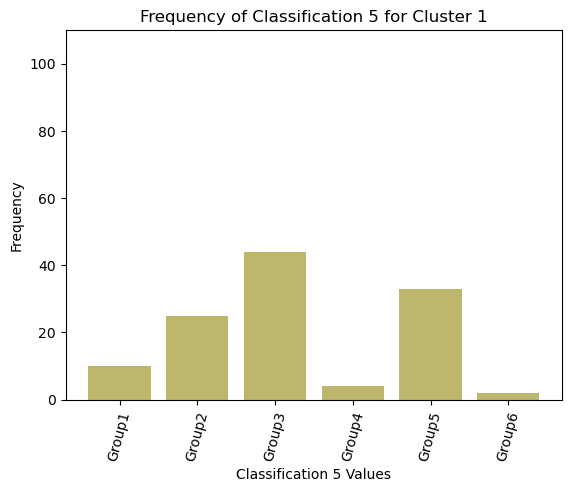

In [61]:
# Plot bar plot of a variable for cluster 1
x= cluster_1['classification_5_encoded'].unique()
y = cluster_1['classification_5_encoded'].value_counts() 
    
plt.bar(x, y, color='darkkhaki')
plt.xlabel('Classification 5 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 5 for Cluster 1')
plt.ylim(0, 110)
plt.xticks([0,1,2,3,4,5], ['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6'])
plt.xticks(rotation=75)
plt.show()

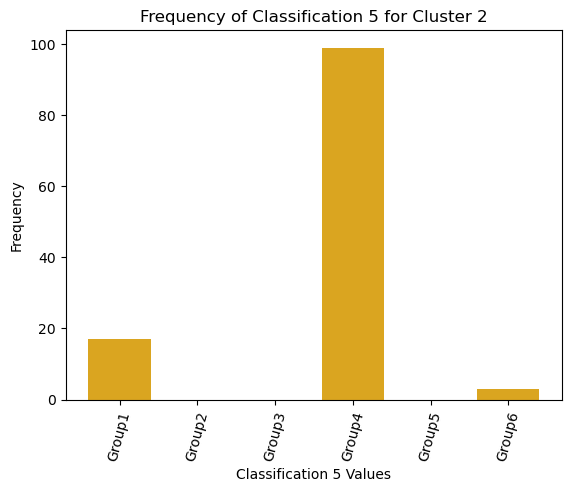

In [62]:
# Plot bar plot of a variable for cluster 2
x= cluster_2['classification_5_encoded'].unique()
y = cluster_2['classification_5_encoded'].value_counts() 
    
plt.bar(x, y, color='goldenrod')
plt.xlabel('Classification 5 Values')
plt.ylabel('Frequency')
plt.title('Frequency of Classification 5 for Cluster 2')
#plt.ylim(0, 110)
plt.xticks([0,1,2,3,4,5], ['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6'])
plt.xticks(rotation=75)
plt.show()

Most individuals in cluster 2 belong to Group 4, but in cluster 1 individuals are more spread across the groups.